In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

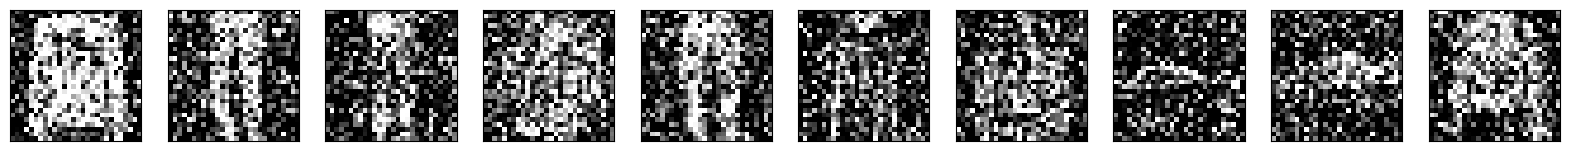

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
encoding_dim = 32
# This is our input image
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
epochs=50,
batch_size=128,
shuffle=True,
validation_data=(x_test_noisy, x_test),verbose=2,callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


Epoch 1/50
469/469 - 2s - loss: 0.3919 - val_loss: 0.3408 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 1s - loss: 0.3313 - val_loss: 0.3278 - 1s/epoch - 3ms/step
Epoch 3/50
469/469 - 2s - loss: 0.3219 - val_loss: 0.3216 - 2s/epoch - 3ms/step
Epoch 4/50
469/469 - 2s - loss: 0.3167 - val_loss: 0.3172 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.3129 - val_loss: 0.3140 - 2s/epoch - 3ms/step
Epoch 6/50
469/469 - 2s - loss: 0.3101 - val_loss: 0.3116 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.3081 - val_loss: 0.3101 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.3068 - val_loss: 0.3089 - 2s/epoch - 3ms/step
Epoch 9/50
469/469 - 2s - loss: 0.3059 - val_loss: 0.3084 - 2s/epoch - 3ms/step
Epoch 10/50
469/469 - 2s - loss: 0.3053 - val_loss: 0.3078 - 2s/epoch - 3ms/step
Epoch 11/50
469/469 - 2s - loss: 0.3049 - val_loss: 0.3074 - 2s/epoch - 4ms/step
Epoch 12/50
469/469 - 1s - loss: 0.3047 - val_loss: 0.3074 - 1s/epoch - 3ms/step
Epoch 13/50
469/469 - 1s - loss: 0.30

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 644us/step


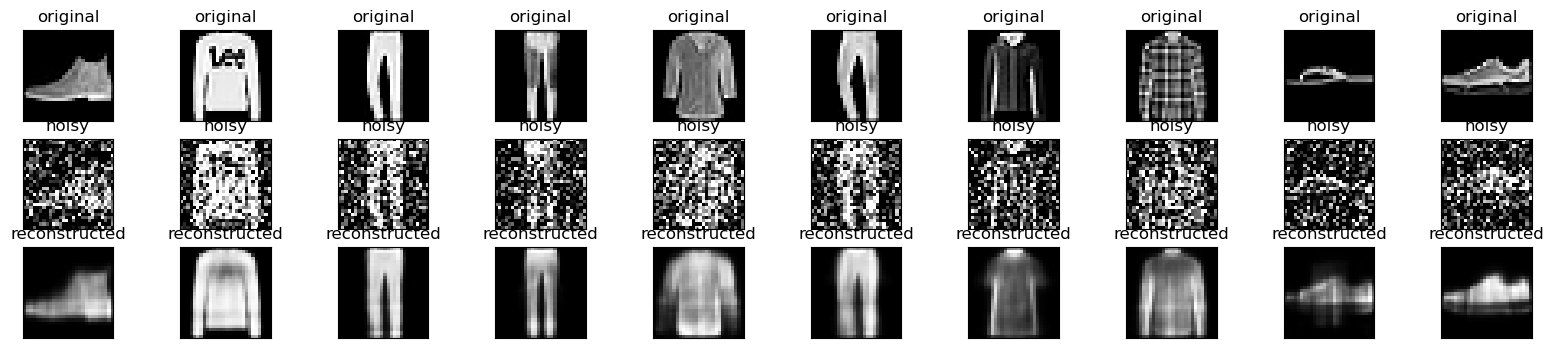

In [7]:
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
 # Display original
 ax = plt.subplot(3, n, i + 1)
 plt.title("original")
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# Display original
 ax = plt.subplot(3, n, i + 1 +n)
 plt.title("noisy")
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# Display reconstruction
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.title("reconstructed")
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
%load_ext watermark
%watermark -a "Navaneeth Sivakumar" -u -d -v -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Navaneeth Sivakumar

Last updated: 2024-03-29

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.18.1

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

